# First course in time series analysis using `Python`

[Saleh Rezaeiravesh](https://www.research.manchester.ac.uk/portal/saleh.rezaeiravesh.html), saleh.rezaeiravesh@manchester.ac.uk

### Learning Objectives:
* Autoregressive models (ARM) of order 1
* Generating samples from ARMs using `numpy`
* Estimating sample mean and variance of a time series using `numpy`
* Estimating autocorrelation function (ACF) from samples of a time series. 



### Python libraries
Import relevant Python libraries. You can find more information about these in the following links:

* [`numpy`](https://numpy.org/doc/stable/index.html)
* [`matplotlib`](https://matplotlib.org/stable/index.html)
* [`statsmodels`](https://www.statsmodels.org/stable/index.html)

These libraries except `statsmodels` are included in any standard installation of `Python`. To install `statsmodels`, follow the above link. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

/home/saleh/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Autoregressive models (ARM)
Let's create a first-order autoregressive model
$$
u_i = a u_{i-k} + \varepsilon_i\,, \quad i=1,2,\cdots
$$
where
$$
\varepsilon_i\sim \mathcal{N}(0,\sigma^2)
$$

To generate `n` samples from this time series, we need to specify the values of coefficient $a$ and noise standard deviation $\sigma$. 
Note that to ensure the generated samples are statistically-stationary, one needs to:

1. choose $0<a<1$, and
2. discard an initial part of the generated samples. To this end, we can generate, say $3/2 n$ samples and discard the first $n/2$. 

In [2]:
n=10000   #total number of samples
a=0.9     #coefficient
u=np.zeros(int(3*n/2))   #array allocation
noise_std=0.1    #noise standard deviation
u[0]=0.          #value of the initial sample

for i in range(1,len(u)):
    eps=np.random.normal(loc=0,scale=1)   #random number from N(0,1)
    u[i]=a*u[i-1]+noise_std*eps
u=u[int(n/2):]  #discard the initial n/2 samples    

In [3]:
#number of generated samples
print(len(u))

10000


Plot the generated samples:

Text(0, 0.5, 'u')

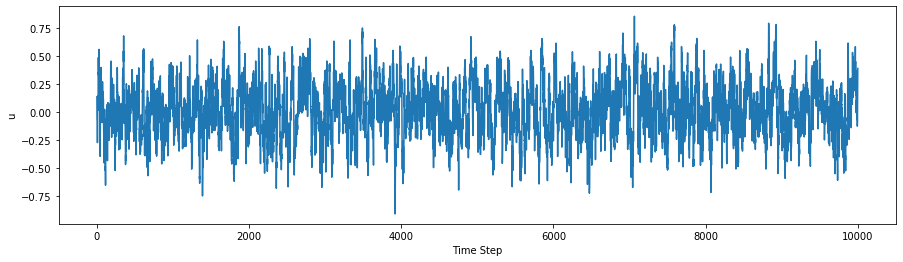

In [4]:
plt.figure(figsize=(15,4))
plt.plot(u)
plt.xlabel('Time Step')
plt.ylabel('u')

Compute sample mean and variance of the time series

In [5]:
m=np.mean(u)
v=np.std(u)**2
print('mean = %g, variance=%g' %(m,v))

mean = 0.0166137, variance=0.0568098


### Sample-estimated ACF
A autocovariance function (ACovF) for a time series samples $\{u_i\}_{i=1}^n$ is obatained from ,

$$
\begin{eqnarray}
\gamma_k&=&cov(u_i , u_{i-k}) \\
&=& \mathbb{E}\left( (u_i-\mathbb{E}(u_i)) (u_{i-k}-\mathbb{E}(u_{i-k}))\right) \\
&=& \mathbb{E}(u_i u_{i-k}) - \mathbb{E}(u_i)\mathbb{E}(u_{i-k}) \,.
\end{eqnarray}
$$

In practice, the expected values are estimated using associated sample-estimators. 


The autocorrelation function (ACF) is defined as the normalized ACovF:

$$
\rho_k=\frac{\gamma_k}{\sigma_{u_i} \sigma_{u_{i-k}}}  \,,
$$

where $\sigma$ represents the standard deviation. 


Below, we compute and plot the sample autocorrelation function (ACF) of a time series using a method provided by `statsmodels`. 

In [6]:
acf_=acf(u,fft=False,nlags=200)   #nlags should be smaller than n;

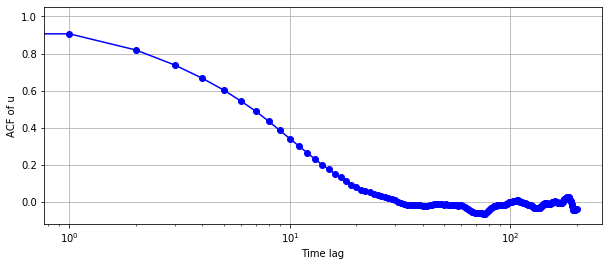

In [7]:
plt.figure(figsize=(10,4))
plt.semilogx(acf_,'-ob')
plt.xlabel('Time lag')
plt.ylabel('ACF of u')
plt.grid()